In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt

from connectivity import constants as const
from connectivity import visualize as vis

%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/maedbhking/.local/share/virtualenvs/cerebellum_connectivity-DbxULmID/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
# initialize directories
dirs = const.Dirs()

In [22]:
# run connectivity routine
# train and validate ridge model(s)
# evaluate best model (based on CV R)

# navigate to scripts dir
# dirs = const.Dirs()
# os.chdir(os.path.join(Path(dirs.base_dir).parent, 'connectivity/scripts'))

## train 
# %run -i 'script_mk.py' --cortex="tesselsWB162" --model_type="ridge" --train_or_eval="train"

# eval
# %run -i 'script_mk.py' --train_or_eval="eval"

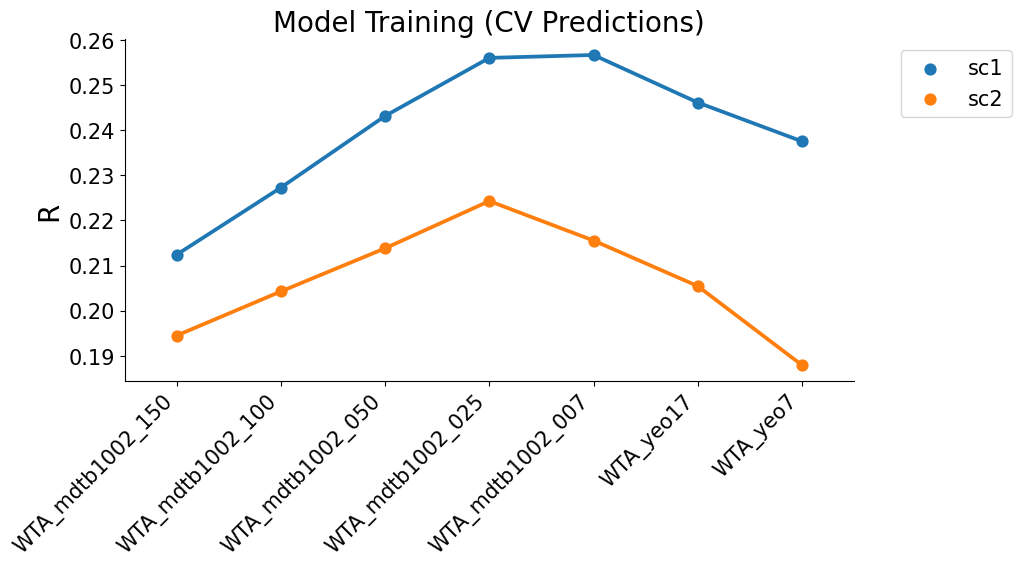

In [12]:
# plot alpha curve for train CVs
# WTA

df = vis.train_summary()

vis.plot_train_predictions(dataframe=df.query('train_model=="WTA"'), 
                               x='train_name', 
                               hue='train_exp'
                          ); 


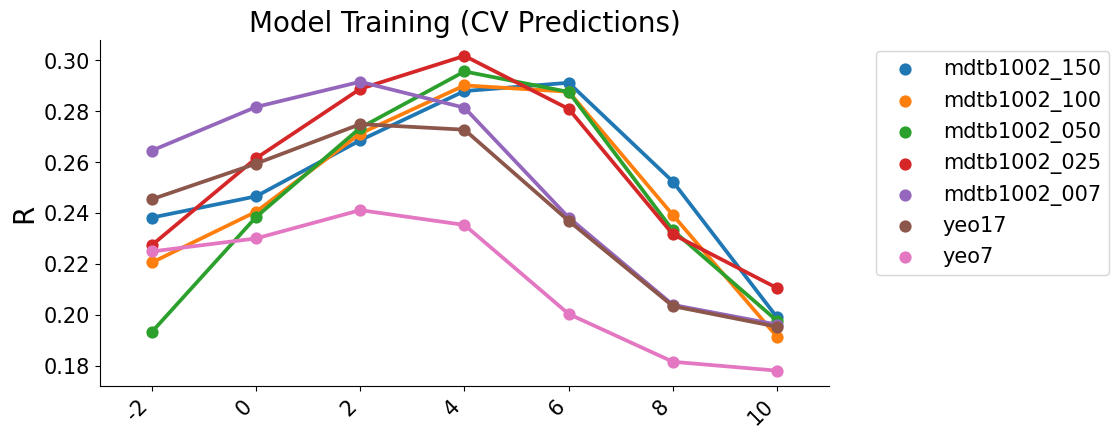

In [13]:
# RIDGE

vis.plot_train_predictions(dataframe=df.query('train_model=="L2regression"'), 
                               x='train_hyperparameter', 
                               hue='train_X_data'
                          )


In [ ]:
# NNLS

vis.plot_train_predictions(dataframe=df.query('train_model=="L2regression"'), 
                               x='train_hyperparameter', 
                               hue='train_X_data'
                          )


best model for sc1 is ridge_mdtb1002_025_alpha_4


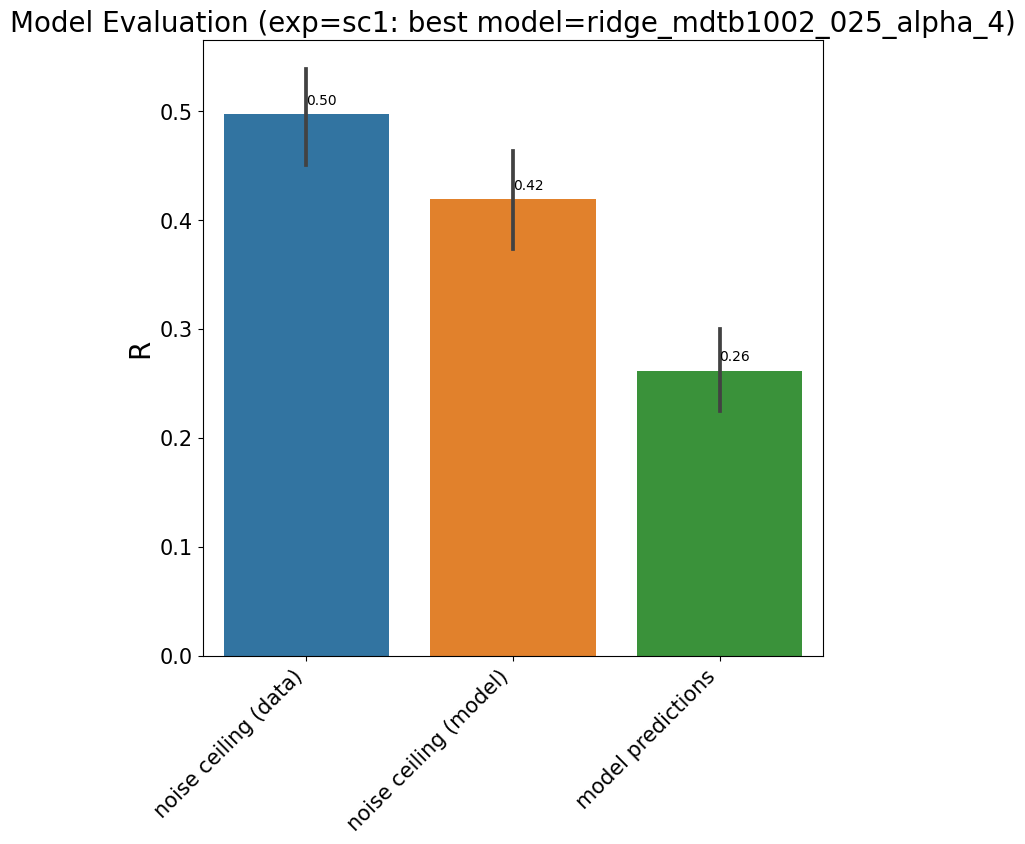

best model for sc2 is ridge_mdtb1002_025_alpha_4


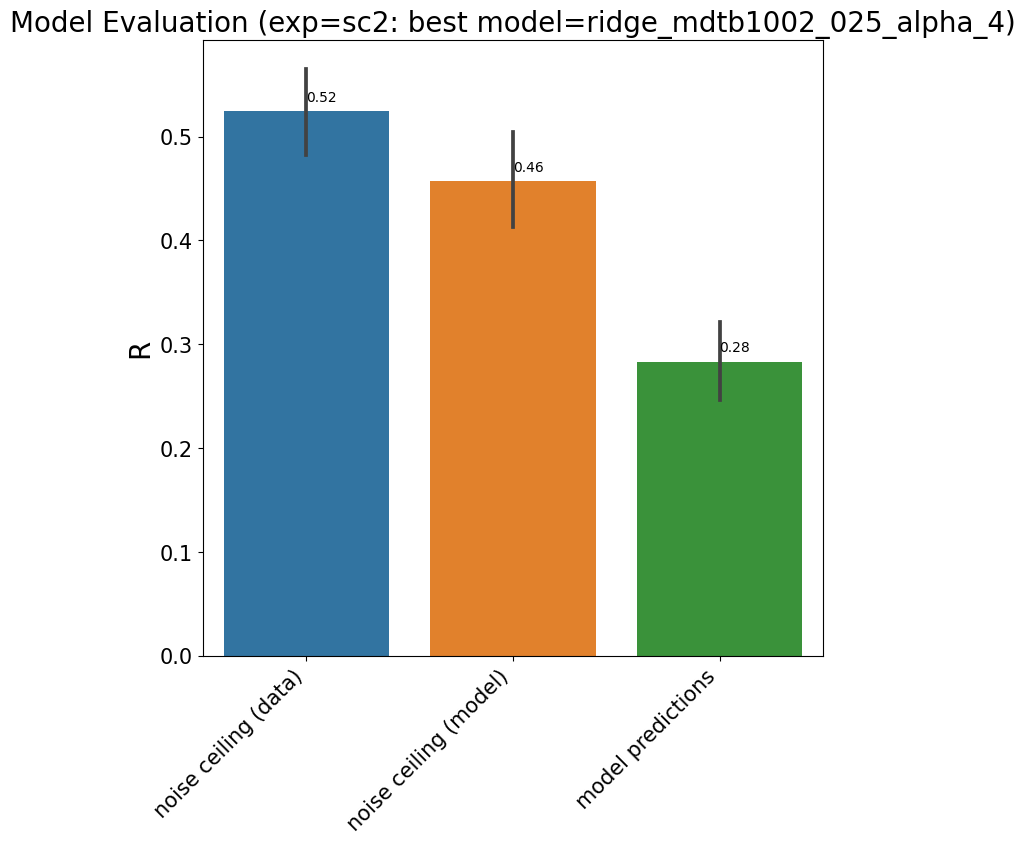

In [37]:
# Model evaluation (noise ceiling and predictions)

# get evaluation 
df_eval = vis.eval_summary()

for exp in ['sc1', 'sc2']:
    
    #plot evaluation
    vis.plot_eval_predictions(dataframe=df_eval, exp=exp)

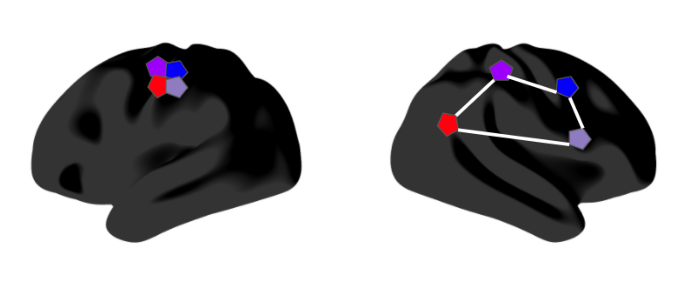

In [259]:
import matplotlib.image as mpimg

fname = os.path.join(dirs.figure, 'sparsity.png')

fig = plt.figure(figsize=(12,12))
img = mpimg.imread(fname)
plt.imshow(img)
plt.axis('off')
plt.show()

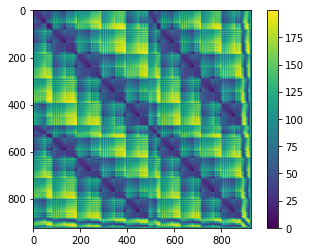

In [113]:
vis.plot_distance_matrix(roi='tessels1002', hemisphere='R')

In [47]:
# visualize model weights - cerebellum

view = vis.plot_train_map(gifti_func='group_weights_cerebellum', exp='sc1')

view

best model for sc1 is ridge_mdtb1002_025_alpha_4


In [48]:
# visualize eval predictions - cerebellum

view = vis.plot_eval_map(gifti_func='group_R_vox', exp='sc1')

view


best model for sc1 is ridge_mdtb1002_025_alpha_4


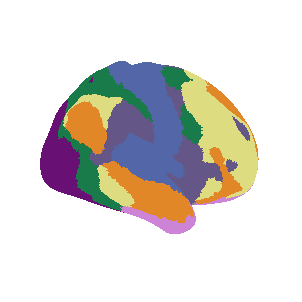

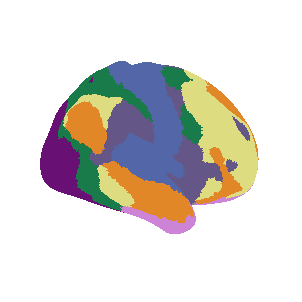

In [49]:
# plot parcellation - cortex

vis.plot_parcellation(parcellation='yeo7', anatomical_structure='cortex', hemisphere='R')

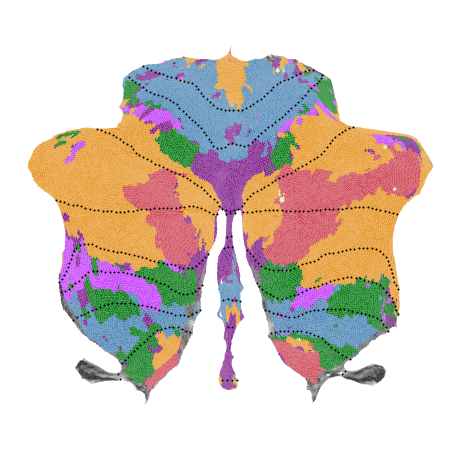

In [42]:
# plot parcellation - cerebellum (wta on task data)

view = vis.plot_parcellation(parcellation='yeo7_wta_suit', anatomical_structure='cerebellum', hemisphere=None)

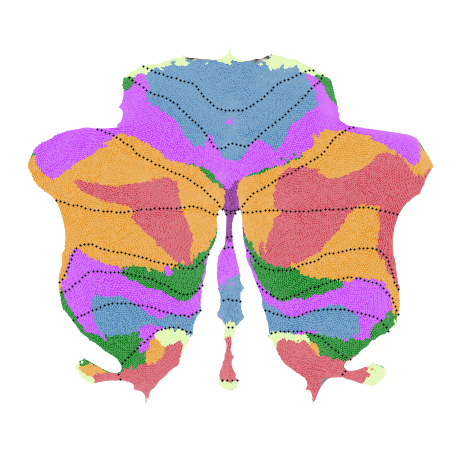

In [3]:
# plot parcellation - cerebellum (wta on resting data)

view = vis.plot_parcellation(parcellation='Buckner_7Networks', anatomical_structure='cerebellum', hemisphere=None)